In [216]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from itertools import count
import numpy as np
import sklearn as skl
import seaborn as sb
import altair as alt

In [217]:
df_pre = pd.read_csv('Pre-FTB_Report.csv')
df_post = pd.read_csv('Post-FTB_Report.csv')

In [218]:
df_pre['Annual hotel spend'] = df_pre['Annual hotel spend'].fillna(0).astype(int)
df_post['Annual hotel spend'] = df_post['Annual hotel spend'].fillna(0).astype(int)

In [255]:
#list(df_pre['Opportunity Owner'])

In [256]:
owner = 'Adam Ward'
df0 = df_pre[df_pre['Opportunity Owner']==owner]
df1 = df0.dropna(subset=['Expected FTB Date'])
df2 = df1[['Account Name','Expected FTB Date','Annual hotel spend']]
df2

,Account Name,Expected FTB Date,Annual hotel spend
288,Blue Eagle Oilfield Services,11/23/2022,50001
694,Frontier Building Corp,11/30/2022,200001
855,Evolution Well Services,11/30/2022,125001
896,Gorbel,12/13/2022,154801
1015,Gorbel,1/16/2023,75001


In [257]:
from datetime import datetime, timedelta

def find_date_range(date_list):
    """
    given a list of dates in the MM/DD/YYYY format, 
    we find the earliest and the latest ones.
    """
    # Convert the dates to datetime objects
    date_objects = [datetime.strptime(date_str, "%m/%d/%Y") for date_str in date_list]
    # Find the earliest and latest datea using the min() and max functions
    earliest_date = min(date_objects)
    latest_date = max(date_objects)
    # Convert the dates back to the MM/DD/YYYY format
    earliest_date_str = earliest_date.strftime("%m/%d/%Y")
    latest_date_str = latest_date.strftime("%m/%d/%Y")
    return earliest_date_str, latest_date_str

In [258]:
find_date_range(df2['Expected FTB Date'])

('11/23/2022', '01/16/2023')

In [259]:
# Define the range using the first and second dates
start_date_str = '11/23/2022'
end_date_str = '01/16/2023'

# Convert the start and end dates to datetime objects
start_date = datetime.strptime(start_date_str, "%m/%d/%Y")
end_date = datetime.strptime(end_date_str, "%m/%d/%Y")

# Add one year to the end date
end_date_plus_one_year = end_date + timedelta(days=365)

# Iterate through the months and print the abbreviated month and year

col = [0 for i in range(len(df2))]

current_date = start_date
while current_date < end_date_plus_one_year:
    #print(current_date.strftime("%b %Y"))
    df2[str(current_date.strftime("%b %Y"))] = col
    current_date += timedelta(days=30)

<ipython-input-259-bb1f156949a9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[str(current_date.strftime("%b %Y"))] = col


In [260]:
for i in range(len(df2)): # loop over accounts for given owner
    start_date = df2.at[df2.index[i],'Expected FTB Date']
    spend = df2.at[df2.index[i],'Annual hotel spend']
    # Convert the date string to a datetime object
    date = datetime.strptime(start_date, "%m/%d/%Y")
    # loop over the following 12 months
    for j in range(12):
        label = date.strftime("%b %Y")  # Format the date as "Abbreviated Month Year"
        df2.at[df2.index[i],label] = round(spend/12)
        # Add 30 days to the date for the next month
        date += timedelta(days=30)
    # to make sure empty months don't return NaN when divided by zero:
    df2.fillna(int(0), inplace=True, downcast='infer') 

In [261]:
# This reproduces the content of "Prospect (Pre-FTB) detail"
# Now I need to reproduce "Customers (Post-FTB) Detail"
# and "Pipeline Summary"

sorted_df2 = df2.sort_values(by='Account Name')
sorted_df2

,Account Name,Expected FTB Date,Annual hotel spend,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023
288,Blue Eagle Oilfield Services,11/23/2022,50001,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167,4167,0,0
855,Evolution Well Services,11/30/2022,125001,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,10417,0,0
694,Frontier Building Corp,11/30/2022,200001,16667,16667,16667,16667,16667,16667,16667,16667,16667,16667,16667,16667,0,0
896,Gorbel,12/13/2022,154801,0,12900,12900,12900,12900,12900,12900,12900,12900,12900,12900,12900,12900,0
1015,Gorbel,1/16/2023,75001,0,0,6250,6250,6250,6250,6250,6250,6250,6250,6250,6250,6250,6250


In [262]:
numeric_columns = sorted_df2.select_dtypes(include='number')
cols = numeric_columns.columns

In [295]:
# Here are the first two lines of "Pipeline Summary":

numeric_columns = sorted_df2.select_dtypes(include='number')
df1exp = (pd.DataFrame(numeric_columns.sum()))
df2exp = pd.DataFrame((sorted_df2[cols] != 0).sum())

df1exp.rename(columns={0: '$ Expected FTB Booking'}, inplace=True)
df2exp.rename(columns={0: '# Expected FTB Accounts'}, inplace=True)

df_exp = (pd.concat([df1exp, df2exp], axis=1)[1:]).transpose()

df_exp

,Nov 2022,Dec 2022,Jan 2023,Feb 2023,Mar 2023,Apr 2023,May 2023,Jun 2023,Jul 2023,Aug 2023,Sep 2023,Oct 2023,Nov 2023,Dec 2023
$ Expected FTB Booking,31251,44151,50401,50401,50401,50401,50401,50401,50401,50401,50401,50401,19150,6250
# Expected FTB Accounts,3,4,5,5,5,5,5,5,5,5,5,5,2,1


In [5]:
pre_owners = np.sort(np.array(df_pre['Opportunity Owner'].unique()))
post_owners = np.sort(np.array(df_post['Opportunity Owner'].unique()))

In [7]:
print(len(pre_owners))
print(len(post_owners))

43
42


In [47]:
for owner in pre_owners:
    if owner not in post_owners:
        print(owner)

Will Gotsch


In [8]:
owner = 'Andrew Shock'

df_pre[df_pre['Opportunity Owner']==owner][
    ['Account Name',
     'Opportunity Name',
     'Stage',
     'Expected FTB Date',
     'Annual hotel spend',
     'Account: Last Activity']].sort_values(by=['Annual hotel spend'], ascending=False).style.set_precision(0)

,Account Name,Opportunity Name,Stage,Expected FTB Date,Annual hotel spend,Account: Last Activity
296,"ATT SPORTS, INC.","ATT SPORTS, INC.-",Discovery,3/1/2023,500000,12/5/2022
276,RLS-CMC,RLS-CMC-,Demo,12/19/2022,200000,12/14/2022
900,Lighting Retrofit Services,Lighting Retrofit Services-,Discovery,1/2/2023,150000,12/14/2022
905,Butler-Cohen,Butler-Cohen-,Demo,12/15/2022,150000,12/13/2022
955,DT Construct,DTConstruct - rev,Discovery,1/2/2023,150000,12/20/2022
1030,B&M Roofing,B&MRoofing,Discovery,1/23/2023,150000,1/11/2023
421,Black Hawk Tower,BlackHawkTower-,Discovery,2/6/2023,100001,12/12/2022
902,AT Towers,ATTowers-,Discovery,1/2/2023,100001,12/14/2022
987,Kinzler Construction Services,KinzlerConstruction2,Discovery,1/9/2023,100001,12/12/2022
974,O'Rourke Wrecking Company,O'Rourke Wrecking-,Demo,1/2/2023,100000,12/13/2022


In [10]:
owner = 'Andrew Shock'

df_post[df_post['Opportunity Owner']==owner][
    ['Account Name',
     'Opportunity Name','Stage',
     'FTB or Revival Date',
     'Annual hotel spend',
     'Account: Last Activity']].sort_values(by=['Annual hotel spend'], ascending=False).style.set_precision(0)

,Account Name,Opportunity Name,Stage,FTB or Revival Date,Annual hotel spend,Account: Last Activity
1755,Cyberhawk Innovations,Cyberhawk Innovations-,Closed Won,8/12/22 12:13,1250000,1/18/2023
1765,National Retrofitting Group,National Retrofitting Group-,Trial,11/21/22 10:35,300000,12/13/2022
1769,Unity Works Lighting,Unity Works Lighting-,Trial,12/1/22 7:16,250000,12/14/2022
1764,Renosys Corporation,Renosys-,FTB,10/21/22 12:20,100000,12/8/2022
1762,Sealwrap Installations,Sealwrap Installations-,Trial,9/26/22 9:44,100000,12/15/2022
1752,Evans Land Clearing LLC,Evans Land Clearing LLC-,Trial,6/13/22 11:31,61440,11/9/2022
1757,City of Bowling Green,"City of Bowling Green, Bowling Green Police Department-",Closed (from stalled),5/5/22 10:19,60001,8/29/2022
1767,Tele-Vac Environmental,Tele-Vac Environmental,Trial,10/26/22 13:35,60000,12/14/2022
1758,DeBra-Kuempel,DeBra-Kuempel-,Trial,5/19/22 9:16,55001,12/13/2022
1761,Boombox,BoomBox (Revival),Closed (from stalled),8/13/22 11:28,50001,11/29/2022


In [44]:
df0 = df_post[df_post['Opportunity Owner']==owner]
df = df0.sort_values(by=['Annual hotel spend'],ascending = False)
                     
alt.Chart(df).mark_bar().encode(
  alt.X('Account Name',sort = None),
  alt.Y('Annual hotel spend', axis=alt.Axis(grid=False)))

alt.Chart(...)

In [34]:
import altair as alt

source = df

alt.Chart(source).mark_bar().encode(
    x='sum(yield):Q',
    y=alt.Y('site:N').sort('-x')
)

TypeError: 'UndefinedType' object is not callable

In [57]:
y_name = 'wgi.law'

In [58]:
features_columns = ['triad_'+("%02d" % (number,)) for number in range(1,14)]
y = np.array(df[y_name])

In [59]:
# design matrix
X = np.array(df[features_columns])
ones = [[1]]*len(X)
Xd = np.hstack((ones,X));

# parameters
theta = np.dot(np.dot(np.linalg.inv(np.dot(Xd.T,Xd)),Xd.T),y)

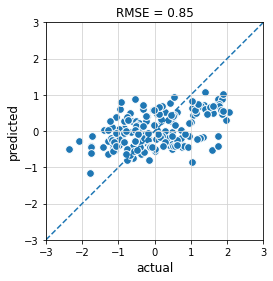

In [11]:
fig, ax = plt.subplots()

predictions = np.dot(Xd,theta)

ax.grid(b=True, which='major', color='lightgray', linestyle='-')
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))
ax.set_aspect(1)

plt.scatter(y,predictions,edgecolors='white',s=60)
plt.plot([-3,3],[-3,3],'--')
plt.xlabel('actual',size=12)
plt.ylabel('predicted',size=12)

# RMSE
MSE = np.square(np.subtract(y,predictions)).mean() 
RMSE = math.sqrt(MSE)
plt.title('RMSE = '+str(round(RMSE,2)))

plt.show()

In [ ]:
#Code in sklearn:

#from sklearn.linear_model import LinearRegression
#clf = LinearRegression()
#clf.fit(X, y)
#predictions = clf.predict(X)

# Logistic Regression

In [122]:
y1 = min(y)
y2 = max(y)
print(y1,y2)

-2.37018537521362 2.04878187179565


In [135]:
ymin = y1 - (y2-y1)/1000
ymax = y2 + (y2-y1)/1000

In [136]:
p = (y-ymin)/(ymax-ymin) # from w to p ("probability")
w = np.log(p/(1-p)) # from p to w (logit)

(array([ 1.,  0.,  0.,  6., 86., 66., 19.,  7.,  0.,  1.]),
 array([-6.90875478e+00, -5.52700382e+00, -4.14525287e+00, -2.76350191e+00,
        -1.38175096e+00,  5.77315973e-14,  1.38175096e+00,  2.76350191e+00,
         4.14525287e+00,  5.52700382e+00,  6.90875478e+00]),
 <BarContainer object of 10 artists>)

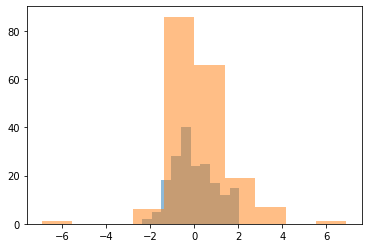

In [137]:
plt.hist(y,alpha=.5)
plt.hist(w,alpha=.5)

In [140]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, w)
predictions = model.predict(X)

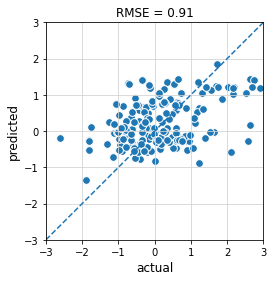

In [141]:
#clf.predict(X)

fig, ax = plt.subplots()

ax.grid(b=True, which='major', color='lightgray', linestyle='-')
ax.set_xlim((-3,3))
ax.set_ylim((-3,3))
ax.set_aspect(1)

plt.scatter(w,predictions,edgecolors='white',s=60)
plt.plot([-3,3],[-3,3],'--')
plt.xlabel('actual',size=12)
plt.ylabel('predicted',size=12)

# RMSE
MSE = np.square(np.subtract(y,predictions)).mean() 
RMSE = math.sqrt(MSE)
plt.title('RMSE = '+str(round(RMSE,2)))

plt.show()

In [63]:

X = [[1, 2], [2, 3], [3, 4], [4, 3]]
y = [19, 26, 33, 30]


clf.score(X, y)

clf.coef_

clf.intercept_

clf.predict([[1, 0], [2, 8]])

[[2.74907838e-09]
 [5.00371391e-01]
 [8.77915201e-01]]


In [15]:
# I'm importing definitions from the previous block
len(X)

186

In [16]:
len(y)

186

In [17]:
from sklearn.linear_model import LogisticRegression

In [20]:
import random
 
def generate_binary_string(n):
    # Generate a random number with n bits
    number = random.getrandbits(n)
    # Convert the number to binary
    binary_string = format(number, '0b')
    return binary_string

In [29]:
yB = np.array([random.getrandbits(1) for i in range(len(y))])

In [31]:
log_reg = LogisticRegression()
log_reg.fit(X,yB)

LogisticRegression()

In [80]:
# 1. Replace missing data withtheir median
# 2. Feature Scaling -> Standardization

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer',SimpleImputer(strategy='median')),
        ('std_scaler',StandardScaler())
    ])


#Replace all missing entries with their medians

imputer = SimpleImputer(strategy='median')
imputer.fit(features)

X = num_pipeline.fit_transform(features)
features = pd.DataFrame(X,columns=features.columns,index=features.index)

NameError: name 'features' is not defined

# Linear regression with sklearn

In [81]:
# Linear Fit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [82]:
train_set, test_set = train_test_split(df, test_size=0.2,random_state=42)

In [83]:
len(test_set)

38

In [108]:
# columns to drop in the input matrix:
list = ['harmonized.name','yr',
        'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
        'gdp','pop','pc.gdp']

features = train_set.drop(list,axis=1)
labels = train_set['wgi.govt'].copy()

X = num_pipeline.fit_transform(features)
features = pd.DataFrame(X,columns=features.columns,index=features.index)

In [109]:
lin_reg = LinearRegression()
lin_reg.fit(X,labels)

LinearRegression()

/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


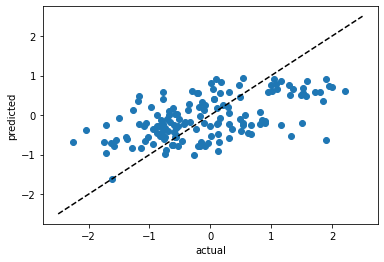

In [110]:
plt.scatter(labels,lin_reg.predict(features))
plt.plot([-2.5,2.5],[-2.5,2.5],'--',c='k')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

<AxesSubplot:>

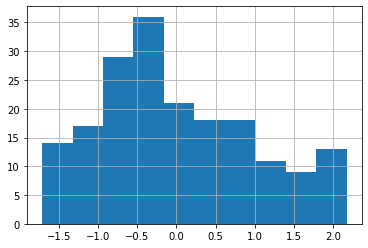

In [87]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.corrupt'].hist()

<AxesSubplot:>

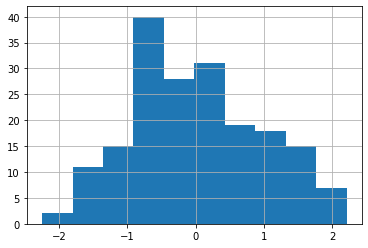

In [88]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.govt'].hist()

<AxesSubplot:>

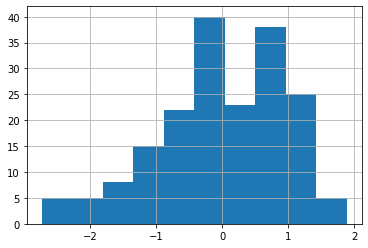

In [89]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.stability'].hist()

<AxesSubplot:>

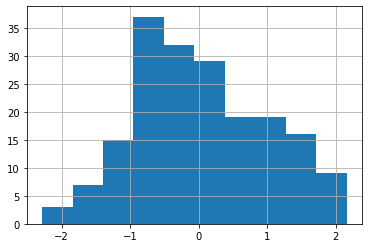

In [90]:
# 'wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice',
df['wgi.regulatory'].hist()

In [94]:
labels = ['wgi.corrupt','wgi.govt','wgi.stability','wgi.regulatory','wgi.law','wgi.voice']

In [95]:
for label in labels:
    print(df[label].min(),df[label].max())

-1.70907258987427 2.16713047027588
-2.25098657608032 2.21273446083069
-2.72988080978394 1.8838939666748
-2.28220462799072 2.1601128578186
-2.37018537521362 2.04878187179565
-2.1851224899292 1.6552220582962


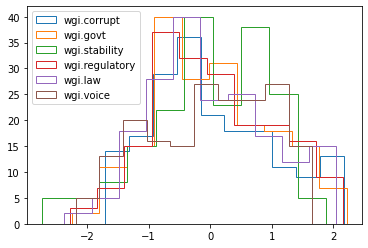

In [107]:
for label in labels:
    plt.hist(df[label],alpha = 1, histtype='step',label=label)
    plt.legend(loc=2)

In [113]:
data = df.drop(['yr','harmonized.name'],axis=1)

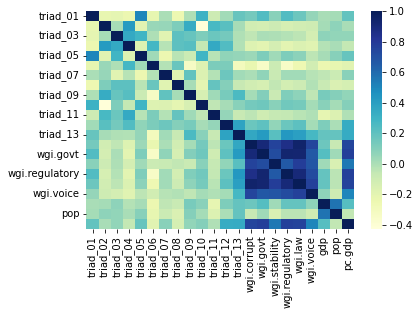

In [117]:
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=False)


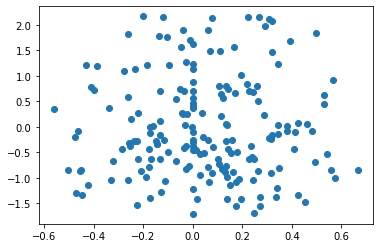

In [126]:
plt.scatter(df['triad_07'],df[labels[0]])

In [122]:
df[['triad_6',labels[0]]]

,triad_13,wgi.corrupt
0,0.000000,-1.407710
1,0.000000,-0.543374
2,0.301411,-0.635694
3,0.000000,1.840800
4,0.000000,1.231043
...,...,...
220,0.000000,-0.259581
222,0.390289,-0.524321
224,0.000000,-0.330311
226,-0.160661,-0.662320


<AxesSubplot:xlabel='triad_01', ylabel='triad_02'>

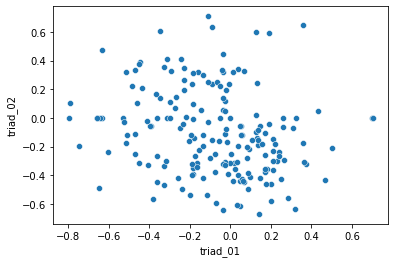

In [132]:
sb.scatterplot(df, x="triad_01", y="triad_02")

In [141]:
df.columns

Index(['yr', 'harmonized.name', 'triad_01', 'triad_02', 'triad_03', 'triad_04',
       'triad_05', 'triad_06', 'triad_07', 'triad_08', 'triad_09', 'triad_10',
       'triad_11', 'triad_12', 'triad_13', 'wgi.corrupt', 'wgi.govt',
       'wgi.stability', 'wgi.regulatory', 'wgi.law', 'wgi.voice', 'gdp', 'pop',
       'pc.gdp'],
      dtype='object')

In [144]:
variables = np.array(df.columns)

In [145]:
variables

array(['yr', 'harmonized.name', 'triad_01', 'triad_02', 'triad_03',
       'triad_04', 'triad_05', 'triad_06', 'triad_07', 'triad_08',
       'triad_09', 'triad_10', 'triad_11', 'triad_12', 'triad_13',
       'wgi.corrupt', 'wgi.govt', 'wgi.stability', 'wgi.regulatory',
       'wgi.law', 'wgi.voice', 'gdp', 'pop', 'pc.gdp'], dtype=object)

<AxesSubplot:xlabel='triad_01', ylabel='wgi.voice'>

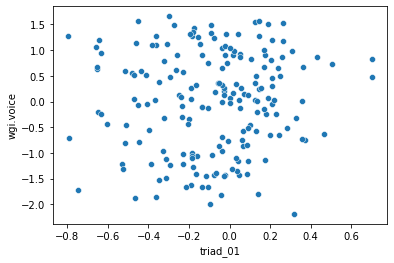

In [146]:
var1 = 'triad_01'
var2 = 'wgi.voice'

sb.scatterplot(df, x=var1, y=var2)

In [149]:
df[[var1,var2,'harmonized.name']]

,triad_01,wgi.voice,harmonized.name
0,-0.185087,-1.006747,Afghanistan
1,0.068945,0.142711,Albania
2,-0.160862,-1.053524,Algeria
3,-0.364029,1.272709,American Samoa
4,-0.310922,1.110087,Andorra
...,...,...,...
220,-0.655749,0.680349,Vanuatu
222,0.084107,-1.405620,Viet Nam
224,-0.230146,-1.026805,West Bank and Gaza
226,-0.234745,-0.309643,Zambia
